<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exercise4_2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 2 - Same as 1, but plot the count of exactly-zero parameters of the model fitted on the 80% training subjects (x axis=the different atlas resolutions, y axis=number of exactly -zero parameters in the entire model, 3 lines with 3 colors for the 3 prediction models with different regularization constraints).

In [ ]:
!pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 11.1 MB/s 


In [ ]:
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=200)
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True,
memory='nilearn_cache')
input_variables =masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F',
dtype=int) #gives 1 for females and 0 for males

/usr/local/lib/python3.7/dist-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)



Dataset created in /root/nilearn_data/oasis1



Downloaded 894287872 of 905208634 bytes (98.8%,    0.2s remaining) ...done. (18 seconds, 0 min)
Extracting data from /root/nilearn_data/oasis1/adcb228c7b26ed4f4fba93bd32bf8d97/archive_dartel.tgz..... done.
/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)



Dataset created in /root/nilearn_data/schaefer_2018



In [ ]:
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
# We prepare the three models in advance

lasso = LogisticRegression(max_iter=1e4, penalty = 'l1', C = 1, solver = 'saga').fit
ridge = LogisticRegression(max_iter=1e4, penalty = 'l2', C = 1, solver = 'saga').fit
e_net = LogisticRegression(max_iter=1e4, penalty = 'elasticnet', l1_ratio=0.5, C = 1, solver = 'saga').fit

In [ ]:
# We create the iterating variable
ROIs = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [ ]:
# We pre-allocate the variables we want to populate with training coefficients
lasso_tr_coef = []
ridge_tr_coef = []
elnet_tr_coef = []

In [ ]:
# We're ready to iterate like we did in exercise 1
for x in ROIs:
    brain_data = datasets.fetch_oasis_vbm(n_subjects=100) 
    yeo = datasets.fetch_atlas_schaefer_2018(n_rois=(x))  # We iterate through the list of ROI values
    masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache') 
    input_variables = masker.fit_transform(brain_data.gray_matter_maps) 
    output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=np.int)

    lasso = LogisticRegression(max_iter=1e4, penalty = 'l1', C = 1, solver = 'saga').fit
    ridge = LogisticRegression(max_iter=1e4, penalty = 'l2', C = 1, solver = 'saga').fit
    e_net = LogisticRegression(max_iter=1e4, penalty = 'elasticnet', l1_ratio=0.5, C = 1, solver = 'saga').fit

    X, y = input_variables, output_variable
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

    LassoReg = lasso(X_train,y_train) # We fit the lasso training model
    score_L = LassoReg.score(X_train, y_train)
    score_L = np.multiply(score_L, 100)
    lasso_tr_coef.append(LassoReg.coef_) 
    print('Lasso training accuracy: %.2f' % ((score_L))) # We print the classification accuracy scores

    RidgeReg = ridge(X_train,y_train) # We fit the ridge training model
    score_R = RidgeReg.score(X_train, y_train)
    score_R = np.multiply(score_R, 100) 
    ridge_tr_coef.append(RidgeReg.coef_) 
    print('Ridge training accuracy: %.2f' % ((score_R))) # We print the classification accuracy scores

    E_netReg = e_net(X_train,y_train) # We fit the elnet training model
    score_E = E_netReg.score(X_train, y_train)
    score_E = np.multiply(score_E, 100) 
    elnet_tr_coef.append(E_netReg.coef_) 
    print('ElasticNet training accuracy: %.2f' % ((score_E))) # We print the classification accuracy scores

/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Lasso training accuracy: 96.25
Ridge training accuracy: 100.00
ElasticNet training accuracy: 97.50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Lasso training accuracy: 100.00
Ridge training accuracy: 100.00
ElasticNet training accuracy: 100.00


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Lasso training accuracy: 100.00
Ridge training accuracy: 100.00
ElasticNet training accuracy: 100.00


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Lasso training accuracy: 100.00
Ridge training accuracy: 100.00
ElasticNet training accuracy: 100.00


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Lasso training accuracy: 100.00
Ridge training accuracy: 100.00
ElasticNet training accuracy: 100.00


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Lasso training accuracy: 100.00
Ridge training accuracy: 100.00
ElasticNet training accuracy: 100.00


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Lasso training accuracy: 100.00
Ridge training accuracy: 100.00
ElasticNet training accuracy: 100.00


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Lasso training accuracy: 100.00
Ridge training accuracy: 100.00
ElasticNet training accuracy: 100.00


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Lasso training accuracy: 100.00
Ridge training accuracy: 100.00
ElasticNet training accuracy: 100.00


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Lasso training accuracy: 100.00
Ridge training accuracy: 100.00
ElasticNet training accuracy: 100.00


In [ ]:
# We create a variable to store values from 1-10
models = list(range(0,10))

10

In [ ]:
# We pre-allocate the variables we want to populate with zero counts
l_zeroes = []
r_zeroes = []
e_zeroes = []

In [ ]:
# We're ready to iterate through models to get the number of zeros in each coefficient array
for x in models:
    l = np.count_nonzero(lasso_tr_coef[x]==0)
    l_zeroes.append(l) # We store the lasso zero counts
    r = np.count_nonzero(ridge_tr_coef[x]==0)
    r_zeroes.append(r) # We store the ridge  zero counts
    e = np.count_nonzero(elnet_tr_coef[x]==0)
    e_zeroes.append(e) # We store the elnet zero counts

In [ ]:
# Let's take a look at the tallies
print(l_zeroes)
print(r_zeroes)
print(e_zeroes)

[65, 162, 254, 357, 452, 554, 650, 742, 849, 939]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[45, 133, 213, 305, 396, 503, 582, 693, 784, 879]


It looks like our code worked, because lasso (array 1) is more stringent than elasticnet (array 2) at removing input variables, and ridge did not remove any because it can only shrink them.

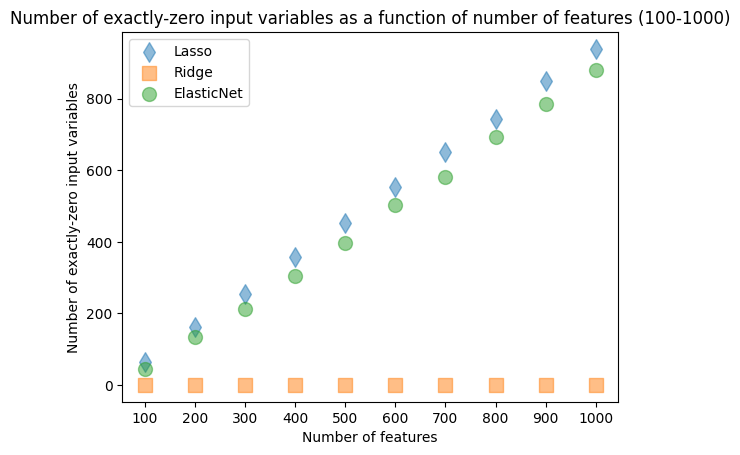

In [ ]:
# Let's look at it in graphical form:
lab = ['Lasso', 'Ridge', 'ElasticNet']
plt.style.use("default")
plt.scatter(ROIs,l_zeroes, s=100, alpha = 0.5, marker = 'd')
plt.scatter(ROIs,r_zeroes, s=100, alpha = 0.5, marker = 's')
plt.scatter(ROIs,e_zeroes, s=100, alpha = 0.5, marker = 'o')
plt.legend(labels=(lab))
plt.gca().set(
    title="Number of exactly-zero input variables as a function of number of features (100-1000)",
    xlabel="Number of features",
    ylabel="Number of exactly-zero input variables",
    xticks = (ROIs)
)
plt.show()

We observe that, as nrois increases, both the lasso and elasticnet models prune an incrementally larger number of input variables by setting their coefficients to exactly zero. The lasso's l1 norm is slightly stricter and therefore excludes more variables, whereas the elasticnet, being a mix between the l1 and l2 norms, is milder. Finally, the ridge regression model did not zero out any input variable because the l2 norm can only shrink coefficients. 